# Load Data

In [2]:
import pandas as pd
import pickle
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dict_table = pickle.load(open('dict_table', 'rb'))
df_historical_data = pd.read_csv('clean_fifa_worldcup_matches.csv')
df_fixture = pd.read_csv('clean_fifa_worldcup_fixture.csv')

In [4]:
dict_table.keys()

dict_keys(['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H'])

In [5]:
dict_table['Group C']

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Argentina,0,0,0,0,0,0,0,0
1,2,Saudi Arabia,0,0,0,0,0,0,0,0
2,3,Mexico,0,0,0,0,0,0,0,0
3,4,Poland,0,0,0,0,0,0,0,0


# Data Preprocessing


In [6]:
print('Shape: ',df_historical_data.shape)
print('Columns: ',df_historical_data.columns)

Shape:  (900, 6)
Columns:  Index(['HomeTeam', 'AwayTeam', 'Year', 'HomeGoals', 'AwayGoals', 'TotalGoals'], dtype='object')


In [7]:
print('Shape: ',df_fixture.shape)
print('Columns: ',df_fixture.columns)

Shape:  (64, 4)
Columns:  Index(['home', 'score', 'away', 'year'], dtype='object')


In [8]:
df_historical_data

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
1,Uruguay,Argentina,1930,4,2,6
2,Uruguay,Yugoslavia,1930,6,1,7
3,Argentina,United States,1930,6,1,7
4,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
895,Brazil,Costa Rica,2018,2,0,2
896,Serbia,Switzerland,2018,1,2,3
897,Serbia,Brazil,2018,0,2,2
898,France,Peru,2018,1,0,1


In [9]:
df_fixture

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


In [10]:
df_historical_data.info()
df_fixture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HomeTeam    900 non-null    object
 1   AwayTeam    900 non-null    object
 2   Year        900 non-null    int64 
 3   HomeGoals   900 non-null    int64 
 4   AwayGoals   900 non-null    int64 
 5   TotalGoals  900 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   home    64 non-null     object
 1   score   64 non-null     object
 2   away    64 non-null     object
 3   year    64 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


In [11]:
df_historical_data.describe()

,Year,HomeGoals,AwayGoals,TotalGoals
count,900.000000,900.000000,900.000000,900.000000
mean,1986.915556,1.763333,1.067778,2.831111
std,23.150270,1.605950,1.082198,1.930474
min,1930.000000,0.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000,1.000000
50%,1990.000000,1.000000,1.000000,3.000000
75%,2006.000000,3.000000,2.000000,4.000000
max,2018.000000,10.000000,7.000000,12.000000


In [12]:
df_fixture.describe()

,year
count,64.0
mean,2022.0
std,0.0
min,2022.0
25%,2022.0
50%,2022.0
75%,2022.0
max,2022.0


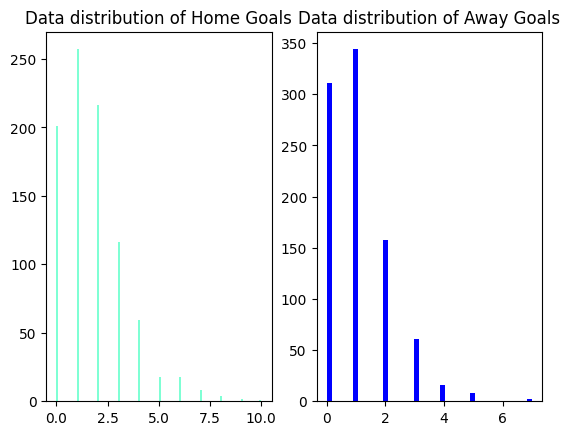

In [13]:
#plt.figure(figsize=(5,8))
plt.subplot(1,2,1);
plt.hist(df_historical_data['HomeGoals'], bins=100, color='aquamarine')
plt.title("Data distribution of Home Goals");

#plt.figure(figsize=(5,8))
plt.subplot(1,2,2);
plt.hist(df_historical_data['AwayGoals'], bins=40, color='blue')
plt.title("Data distribution of Away Goals");

plt.show()

In [14]:
df_home = df_historical_data[['HomeTeam', 'HomeGoals', 'AwayGoals']]
df_away = df_historical_data[['AwayTeam', 'HomeGoals', 'AwayGoals']]

In [15]:
df_home

,HomeTeam,HomeGoals,AwayGoals
0,France,4,1
1,Uruguay,4,2
2,Uruguay,6,1
3,Argentina,6,1
4,Paraguay,1,0
...,...,...,...
895,Brazil,2,0
896,Serbia,1,2
897,Serbia,0,2
898,France,1,0


In [16]:
# rename the columns for better understanding
df_home = df_home.rename(columns={'HomeTeam': 'Team', 'HomeGoals': 'GoalsScored', 'AwayGoals':'GoalsConceded'})
df_away = df_away.rename(columns={'AwayTeam': 'Team', 'HomeGoals': 'GoalsConceded', 'AwayGoals':'GoalsScored'})

In [17]:
# build team strength for better prediction
# calculate the mean of each team
df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby('Team').mean()
df_team_strength


,GoalsScored,GoalsConceded
Team,,
Algeria,1.000000,1.461538
Angola,0.333333,0.666667
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Austria,1.482759,1.620690
...,...,...
Uruguay,1.553571,1.321429
Wales,0.800000,0.800000
West Germany,2.112903,1.241935


# Function for calculating points

In [18]:
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # lambda = goals_scored * goals_conceded
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        
        for x in range(0,11): #number of goals home team
            for y in range(0,11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)
                
        

In [19]:
predict_points('Argentina', 'Mexico')
predict_points('England', 'United States')
predict_points('Qatar', 'Ecuador')
predict_points('Qatar', 'Argentina')

(0, 0)

# Prediction

In [20]:
df_fixture_group_48 = df_fixture[:48].copy()
df_fixture_knockout = df_fixture[48:56].copy()
df_fixture_quarter = df_fixture[56:60].copy()
df_fixture_semi = df_fixture[60:62].copy()
df_fixture_final = df_fixture[62:].copy()

In [21]:
df_fixture_group_48

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
5,Netherlands,Match 36,Qatar,2022
6,England,Match 3,Iran,2022
7,United States,Match 4,Wales,2022
8,Wales,Match 17,Iran,2022
9,England,Match 20,United States,2022


In [22]:
for group in dict_table:
    print(dict_table[group]['Team'].values)

['Qatar (H)' 'Ecuador' 'Senegal' 'Netherlands']
['England' 'Iran' 'United States' 'Wales']
['Argentina' 'Saudi Arabia' 'Mexico' 'Poland']
['France' 'Australia' 'Denmark' 'Tunisia']
['Spain' 'Costa Rica' 'Germany' 'Japan']
['Belgium' 'Canada' 'Morocco' 'Croatia']
['Brazil' 'Serbia' 'Switzerland' 'Cameroon']
['Portugal' 'Ghana' 'Uruguay' 'South Korea']


In [23]:
for group in dict_table:
    teams_in_group = dict_table[group]['Team'].values
    df_fixture_group_6 = df_fixture_group_48[df_fixture_group_48['home'].isin(teams_in_group)]
    for index, row in df_fixture_group_6.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        dict_table[group].loc[dict_table[group]['Team'] == home, 'Pts'] += points_home
        dict_table[group].loc[dict_table[group]['Team'] == away, 'Pts'] += points_away
        
    dict_table[group] = dict_table[group].sort_values('Pts', ascending=False).reset_index()
    dict_table[group] = dict_table[group][['Team', 'Pts']]
    dict_table[group] = dict_table[group].round(0)

In [24]:
dict_table['Group C']

,Team,Pts
0,Argentina,7.0
1,Poland,6.0
2,Mexico,4.0
3,Saudi Arabia,1.0


In [25]:
df_fixture_knockout

,home,score,away,year
48,Winners Group A,Match 49,Runners-up Group B,2022
49,Winners Group C,Match 50,Runners-up Group D,2022
50,Winners Group D,Match 52,Runners-up Group C,2022
51,Winners Group B,Match 51,Runners-up Group A,2022
52,Winners Group E,Match 53,Runners-up Group F,2022
53,Winners Group G,Match 54,Runners-up Group H,2022
54,Winners Group F,Match 55,Runners-up Group E,2022
55,Winners Group H,Match 56,Runners-up Group G,2022


In [26]:
for group in dict_table:
    group_winner = dict_table[group].loc[0, 'Team']
    runners_up = dict_table[group].loc[1, 'Team']
    
    df_fixture_knockout.replace({f'Winners {group}': group_winner,
                                f'Runners-up {group}': runners_up}, inplace=True)
    
df_fixture_knockout['winner'] = '?'
df_fixture_knockout

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,?
49,Argentina,Match 50,Denmark,2022,?
50,France,Match 52,Poland,2022,?
51,England,Match 51,Senegal,2022,?
52,Germany,Match 53,Belgium,2022,?
53,Brazil,Match 54,Uruguay,2022,?
54,Croatia,Match 55,Spain,2022,?
55,Portugal,Match 56,Switzerland,2022,?


# Function to get_winner 

In [27]:
def get_winner(df_fixture_updated):
    for index, row in df_fixture_updated.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        if points_home> points_away:
            winner = home
        else:
            winner = away
        df_fixture_updated.loc[index, 'winner'] = winner
    return df_fixture_updated

In [28]:
get_winner(df_fixture_knockout)


,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,Netherlands
49,Argentina,Match 50,Denmark,2022,Argentina
50,France,Match 52,Poland,2022,France
51,England,Match 51,Senegal,2022,England
52,Germany,Match 53,Belgium,2022,Germany
53,Brazil,Match 54,Uruguay,2022,Brazil
54,Croatia,Match 55,Spain,2022,Spain
55,Portugal,Match 56,Switzerland,2022,Portugal


In [29]:
df_fixture_quarter

,home,score,away,year
56,Winners Match 53,Match 58,Winners Match 54,2022
57,Winners Match 49,Match 57,Winners Match 50,2022
58,Winners Match 55,Match 60,Winners Match 56,2022
59,Winners Match 51,Match 59,Winners Match 52,2022


In [30]:
def update_table(df_fixture_round_1, df_fixture_round_2):
    for index, row in df_fixture_round_1.iterrows():
        winner = df_fixture_round_1.loc[index, 'winner']
        match = df_fixture_round_1.loc[index, 'score']
        df_fixture_round_2.replace({f'Winners {match}':winner}, inplace=True)
    df_fixture_round_2['winner'] = '?'
    return df_fixture_round_2

In [31]:
update_table(df_fixture_knockout, df_fixture_quarter)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,?
57,Netherlands,Match 57,Argentina,2022,?
58,Spain,Match 60,Portugal,2022,?
59,England,Match 59,France,2022,?


In [32]:
get_winner(df_fixture_quarter)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,Brazil
57,Netherlands,Match 57,Argentina,2022,Netherlands
58,Spain,Match 60,Portugal,2022,Portugal
59,England,Match 59,France,2022,France


# SemiFinal

In [33]:
update_table(df_fixture_quarter, df_fixture_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,?
61,France,Match 62,Portugal,2022,?


In [34]:
get_winner(df_fixture_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,Brazil
61,France,Match 62,Portugal,2022,France


# Final

In [35]:
update_table(df_fixture_semi, df_fixture_final)

,home,score,away,year,winner
62,Losers Match 61,Match 63,Losers Match 62,2022,?
63,Brazil,Match 64,France,2022,?


In [36]:
get_winner(df_fixture_final)

,home,score,away,year,winner
62,Losers Match 61,Match 63,Losers Match 62,2022,Losers Match 62
63,Brazil,Match 64,France,2022,Brazil


In [37]:
print('Winner is :')
df_fixture_final.iloc[-1, -1]

Winner is :


'Brazil'